In [1]:
import pandas as pd
import numpy as np
import os, random, math, datetime
from matplotlib import pyplot
from openalea.vmango.simulation.fruitmodel.fruit_model_main import growth_main
from openalea.vmango.simulation.fruitmodel.fruitmodel import initialize_input
from openalea.vmango.simulation.fruitmodel.fruitmodel_error import FruitModelValueError

In [2]:
path_hourly = '../../share/environment/weather_hourly_stpierre_2002.csv'
path_daily = '../../share/environment/weather_daily_stpierre_2002.csv'
path_sunlit = '../../share/environment/sunlit_fractions.csv'
path_params = '../../share/parameters/fruitmodel/cogshall.toml'

In [3]:
df_input_hourly, df_input_daily, df_sunlit, params = initialize_input(path_hourly, path_daily, path_sunlit, path_params)

In [4]:
bloom_date = np.datetime64(datetime.datetime.strptime('01/11/2002', '%d/%m/%Y'), 'D')
nb_fruits = 1
nb_leaves_treatments = [5, 10, 25, 50, 100, 150]

weight_1 = params.main.fruitDM0_weight_1
mu_1 = params.main.fruitDM0_mu_1
sigma_1 = params.main.fruitDM0_sigma_1
weight_2 = params.main.fruitDM0_weight_2
mu_2 = params.main.fruitDM0_mu_2
sigma_2 = params.main.fruitDM0_sigma_2

DM_fruit_0 = weight_1 * np.random.normal(mu_1, sigma_1) + weight_2 * np.random.normal(mu_2, sigma_2)
sunlit_bs = df_sunlit.iloc[:,random.randrange(0, 5)].to_numpy() 

In [5]:
dfs = []
for i, nb_leaves in enumerate(nb_leaves_treatments):
    df = None
    try:
        df = growth_main(
            bloom_date,
            nb_fruits,
            nb_leaves,
            sunlit_bs,
            df_input_daily,
            df_input_hourly,
            params,
            DM_fruit_0,
            DM_fruit_ini=np.nan,
            sim_date_ini=None,
            dd_thresh=np.nan,
            stop_sim_ddcum=np.nan,
            verbose=False
        )
    except FruitModelValueError as e:
        print(i, nb_leaves, e)
    finally:
        dfs.append(df)
        if df is not None:
            display(df.head())


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,120.020636,13.841523,94.970787,11.464846,85.074831,9.430982,0.119910,2.615529,-0.407147,...,0.002513,0.005101,0.007387,0.015001,0.009729,0.019181,356.90,5.0,0.326157,42.0
1,2002-12-14,128.579210,13.890301,103.637672,11.504452,92.838627,9.463562,0.117967,2.572635,-0.402743,...,0.002575,0.004675,0.006939,0.014189,0.009293,0.017644,367.50,5.0,0.326157,43.0
2,2002-12-15,135.976645,13.968680,110.198403,11.568092,98.715729,9.515912,0.116056,2.530444,-0.333191,...,0.002658,0.004395,0.006675,0.013727,0.009097,0.016650,377.40,5.0,0.326157,44.0
3,2002-12-16,145.081306,14.039145,118.294373,11.625306,105.968099,9.562977,0.114176,2.488944,-0.317916,...,0.002694,0.004094,0.006356,0.013143,0.008799,0.015567,386.90,5.0,0.326157,45.0
4,2002-12-17,152.746343,14.140019,125.076478,11.707208,112.043509,9.630350,0.112326,2.448126,-0.319061,...,0.002758,0.003871,0.006145,0.012774,0.008656,0.014780,396.55,5.0,0.326157,46.0


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,120.020636,13.841523,94.970787,11.464846,85.074831,9.430982,0.239819,2.615529,-0.406306,...,0.002513,0.005101,0.007387,0.015001,0.009729,0.019181,356.90,10.0,0.326157,42
1,2002-12-14,128.667997,14.034694,103.599943,11.621689,92.804829,9.560002,0.235934,2.572635,-0.404348,...,0.002564,0.004713,0.006996,0.014273,0.009487,0.017818,367.50,10.0,0.326157,43
2,2002-12-15,136.317884,14.294084,110.239780,11.832293,98.752795,9.733244,0.232112,2.530444,-0.337429,...,0.002637,0.004470,0.006790,0.013898,0.009506,0.017001,377.40,10.0,0.326157,44
3,2002-12-16,145.820322,14.527923,118.559317,12.022148,106.205437,9.889419,0.228352,2.488944,-0.323530,...,0.002668,0.004193,0.006511,0.013372,0.009368,0.016035,386.90,10.0,0.326157,45
4,2002-12-17,154.010817,14.819567,125.657093,12.258925,112.563624,10.084191,0.224652,2.448126,-0.326158,...,0.002728,0.003995,0.006344,0.013066,0.009405,0.015373,396.55,10.0,0.326157,46


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,120.020636,13.841523,94.970787,11.464846,85.074831,9.430982,0.599548,2.615529,-0.404383,...,0.002513,0.005101,0.007387,0.015001,0.009729,0.019181,356.90,25.0,0.326157,42
1,2002-12-14,128.871206,14.365193,103.513591,11.890015,92.727475,9.780726,0.589835,2.572635,-0.407909,...,0.002537,0.004800,0.007125,0.014461,0.009938,0.018216,367.50,25.0,0.326157,43
2,2002-12-15,137.109301,15.056616,110.329427,12.451356,98.833101,10.242485,0.580280,2.530444,-0.347233,...,0.002577,0.004644,0.007055,0.014276,0.010498,0.017820,377.40,25.0,0.326157,44
3,2002-12-16,147.543402,15.677395,119.169147,12.955329,106.751722,10.657054,0.570879,2.488944,-0.336504,...,0.002582,0.004418,0.006862,0.013862,0.010767,0.017122,386.90,25.0,0.326157,45
4,2002-12-17,156.950315,16.401604,127.005081,13.543245,113.771151,11.140673,0.561631,2.448126,-0.341916,...,0.002614,0.004267,0.006779,0.013660,0.011245,0.016722,396.55,25.0,0.326157,46


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,120.020636,13.841523,94.970787,11.464846,85.074831,9.430982,1.199096,2.615529,-0.403222,...,0.002513,0.005101,0.007387,0.015001,0.009729,0.019181,356.90,50.0,0.326157,42
1,2002-12-14,128.993785,14.564567,103.461502,12.051872,92.680814,9.913870,1.179671,2.572635,-0.410393,...,0.002518,0.004852,0.007202,0.014572,0.010215,0.018456,367.50,50.0,0.326157,43
2,2002-12-15,137.546785,15.452758,110.399598,12.772950,98.895960,10.507029,1.160560,2.530444,-0.352116,...,0.002538,0.004732,0.007188,0.014457,0.011028,0.018239,377.40,50.0,0.326157,44
3,2002-12-16,148.466823,16.285978,119.502018,13.449377,107.049908,11.063458,1.141759,2.488944,-0.343256,...,0.002521,0.004532,0.007040,0.014094,0.011539,0.017689,386.90,50.0,0.326157,45
4,2002-12-17,158.495641,17.216064,127.727729,14.204429,114.418499,11.684564,1.123262,2.448126,-0.349572,...,0.002530,0.004398,0.006989,0.013917,0.012240,0.017398,396.55,50.0,0.326157,46


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,120.020636,13.841523,94.970787,11.464846,85.074831,9.430982,2.398192,2.615529,-0.402830,...,0.002513,0.005101,0.007387,0.015001,0.009729,0.019181,356.90,100.0,0.326157,42
1,2002-12-14,129.035176,14.631892,103.443913,12.106526,92.665057,9.958829,2.359341,2.572635,-0.411244,...,0.002512,0.004869,0.007228,0.014609,0.010309,0.018537,367.50,100.0,0.326157,43
2,2002-12-15,137.692805,15.583874,110.423918,12.879391,98.917746,10.594587,2.321120,2.530444,-0.353659,...,0.002524,0.004760,0.007232,0.014515,0.011205,0.018378,377.40,100.0,0.326157,44
3,2002-12-16,148.780341,16.498896,119.609925,13.622224,107.146571,11.205642,2.283518,2.488944,-0.345529,...,0.002498,0.004572,0.007102,0.014171,0.011816,0.017887,386.90,100.0,0.326157,45
4,2002-12-17,159.037974,17.518804,127.967613,14.450202,114.633388,11.886736,2.246525,2.448126,-0.352250,...,0.002496,0.004446,0.007066,0.014008,0.012621,0.017650,396.55,100.0,0.326157,46


,date,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential_fruit,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LFratio,sunlit_bs,DAB
0,2002-12-13,120.020636,13.841523,94.970787,11.464846,85.074831,9.430982,3.597288,2.615529,-0.403190,...,0.002513,0.005101,0.007387,0.015001,0.009729,0.019181,356.90,150.0,0.326157,42
1,2002-12-14,128.997189,14.570105,103.460055,12.056368,92.679517,9.917568,3.539012,2.572635,-0.410469,...,0.002518,0.004853,0.007204,0.014575,0.010223,0.018463,367.50,150.0,0.326157,43
2,2002-12-15,137.558123,15.462454,110.401880,12.780821,98.898004,10.513503,3.481680,2.530444,-0.352125,...,0.002537,0.004734,0.007191,0.014462,0.011041,0.018250,377.40,150.0,0.326157,44
3,2002-12-16,148.503012,16.321865,119.505293,13.478510,107.052841,11.087422,3.425277,2.488944,-0.343526,...,0.002518,0.004539,0.007052,0.014109,0.011587,0.017724,386.90,150.0,0.326157,45
4,2002-12-17,158.593472,17.300720,127.746610,14.273155,114.435413,11.741097,3.369787,2.448126,-0.350112,...,0.002522,0.004413,0.007013,0.013948,0.012350,0.017475,396.55,150.0,0.326157,46


### Lechaudel 2007, p. 226, fruit fresh matter vs days after bloom

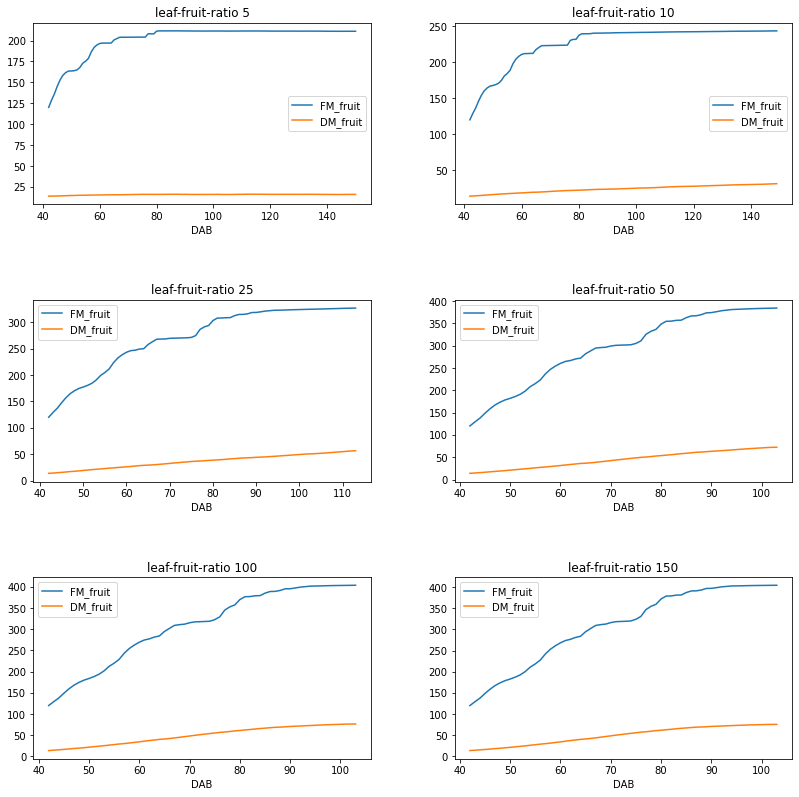

In [6]:
fig_1, axs_1 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_1 = axs_1.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'FM_fruit', 'DM_fruit']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_1[i], figsize=(12,12))

### Lechaudel 2005, p. 589, stem and leaf reserves vs days after bloom

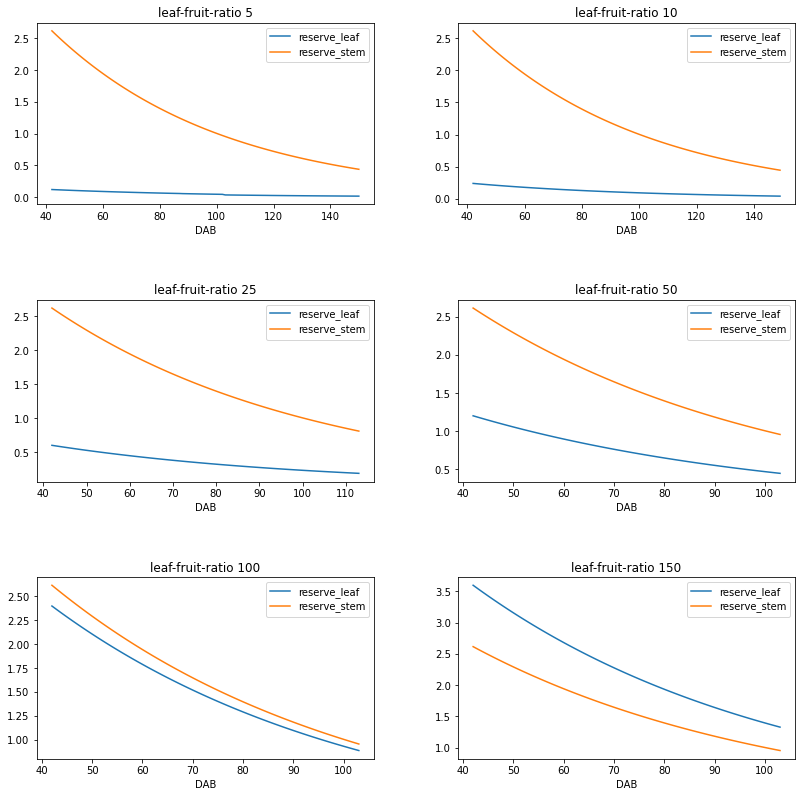

In [7]:
fig_2, axs_2 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_2 = axs_2.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'reserve_leaf', 'reserve_stem']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_2[i], figsize=(12,12))

### Lechaudel 2005, p. 590, fruit dry matter vs degree days

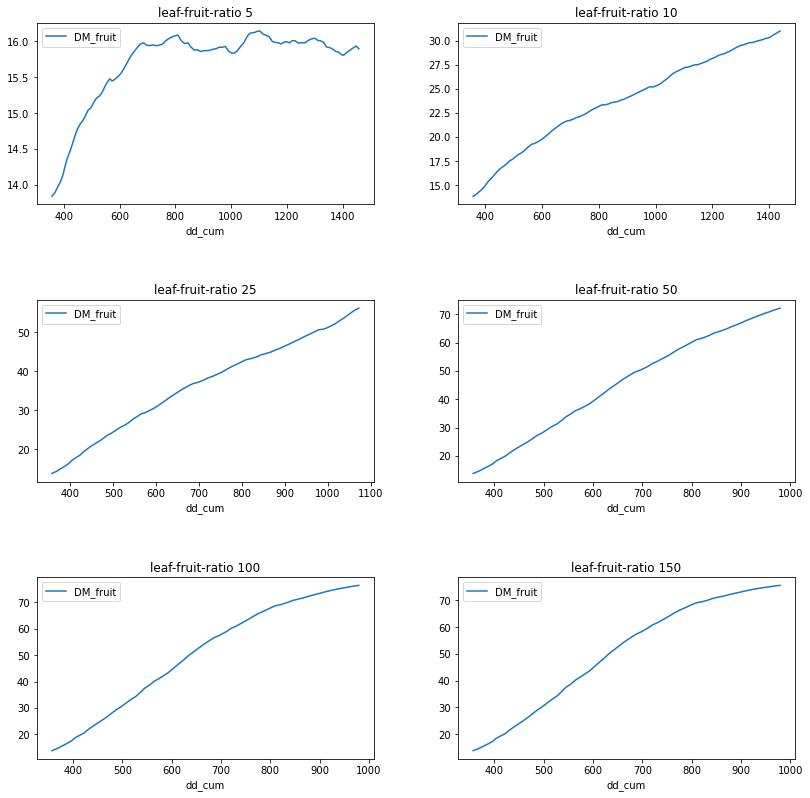

In [8]:
fig_3, axs_3 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_3 = axs_3.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['dd_cum', 'DM_fruit']].plot(
            x=0, y=1, title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_3[i], figsize=(12,12))